In [1]:
# Analysis of Tesla Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("TSLA.CSV")

In [3]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0
...,...,...,...,...,...,...,...,...
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0


In [4]:
# Basic informations of the Dataset

In [6]:
data.shape

(758, 8)

In [7]:
data.head().T

,0,1,2,3,4
Date,2019-05-21,2019-05-22,2019-05-23,2019-05-24,2019-05-28
Open,39.551998,39.82,38.868,39.966,38.240002
High,41.48,40.787998,39.894001,39.995998,39.0
Low,39.208,38.355999,37.243999,37.75,37.57
Close,41.015999,38.546001,39.098,38.125999,37.740002
Volume,90019500,93426000,132735500,70683000,51564500
Dividends,0,0,0,0,0
Stock Splits,0.0,0.0,0.0,0.0,0.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          758 non-null    object 
 1   Open          758 non-null    float64
 2   High          758 non-null    float64
 3   Low           758 non-null    float64
 4   Close         758 non-null    float64
 5   Volume        758 non-null    int64  
 6   Dividends     758 non-null    int64  
 7   Stock Splits  758 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 47.5+ KB


In [10]:
stock_data= data[["Date","Close"]]
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [ ]:
# Here we can see the type of the Date column is Object. The type of this column should be Date Time. So we need to change the type 

In [12]:
stock_data["Date"]=pd.to_datetime(stock_data["Date"])

In [13]:
# To check the type after changing it

stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [ ]:
# Setting index
# As it is a Time Series data the Date column should be an index so that we can do data sclicing on Date column easily the visualization gets simpler

In [15]:
stock_data= stock_data.set_index("Date")
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [16]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


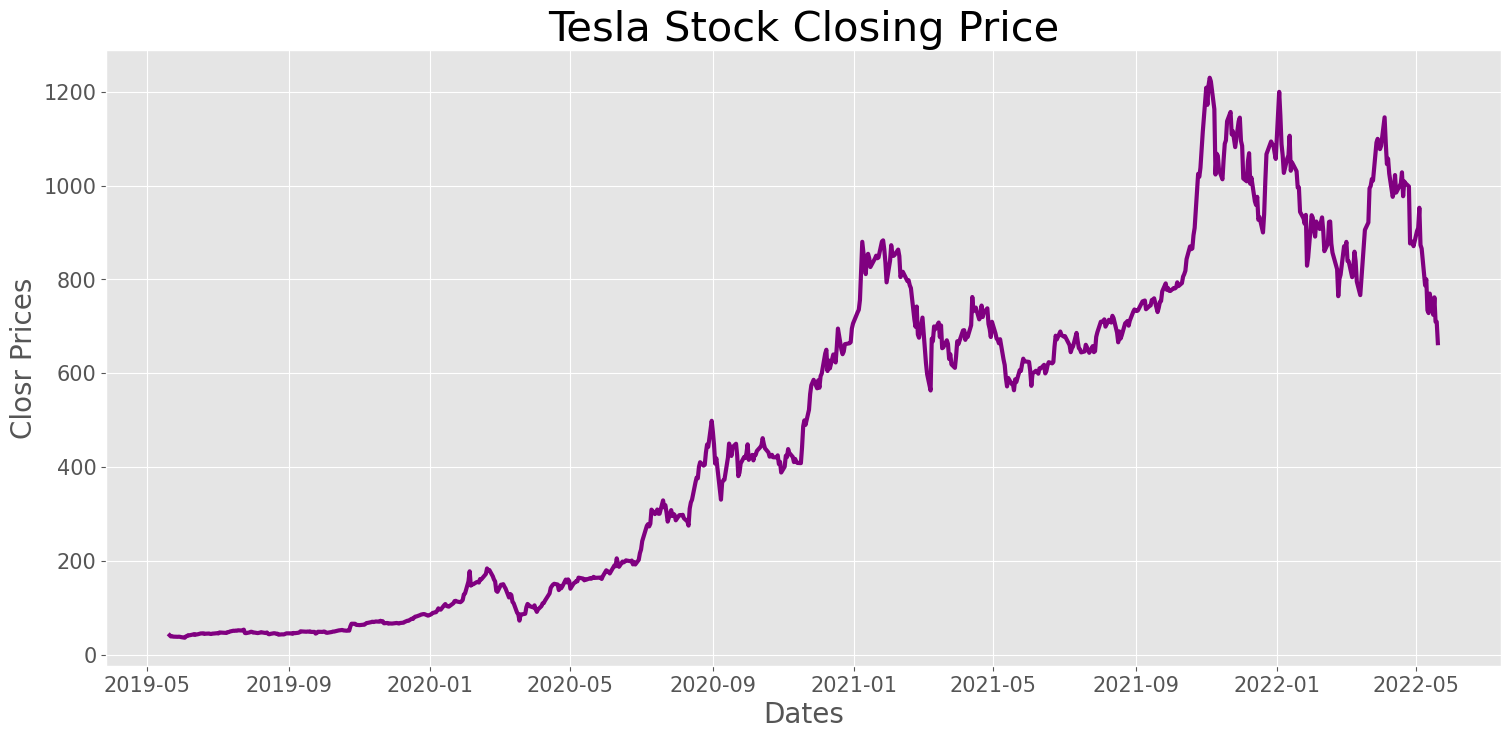

In [23]:
# Line chart for Closing price

plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Closr Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(stock_data['Close'],linewidth = 3, color = 'purple')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

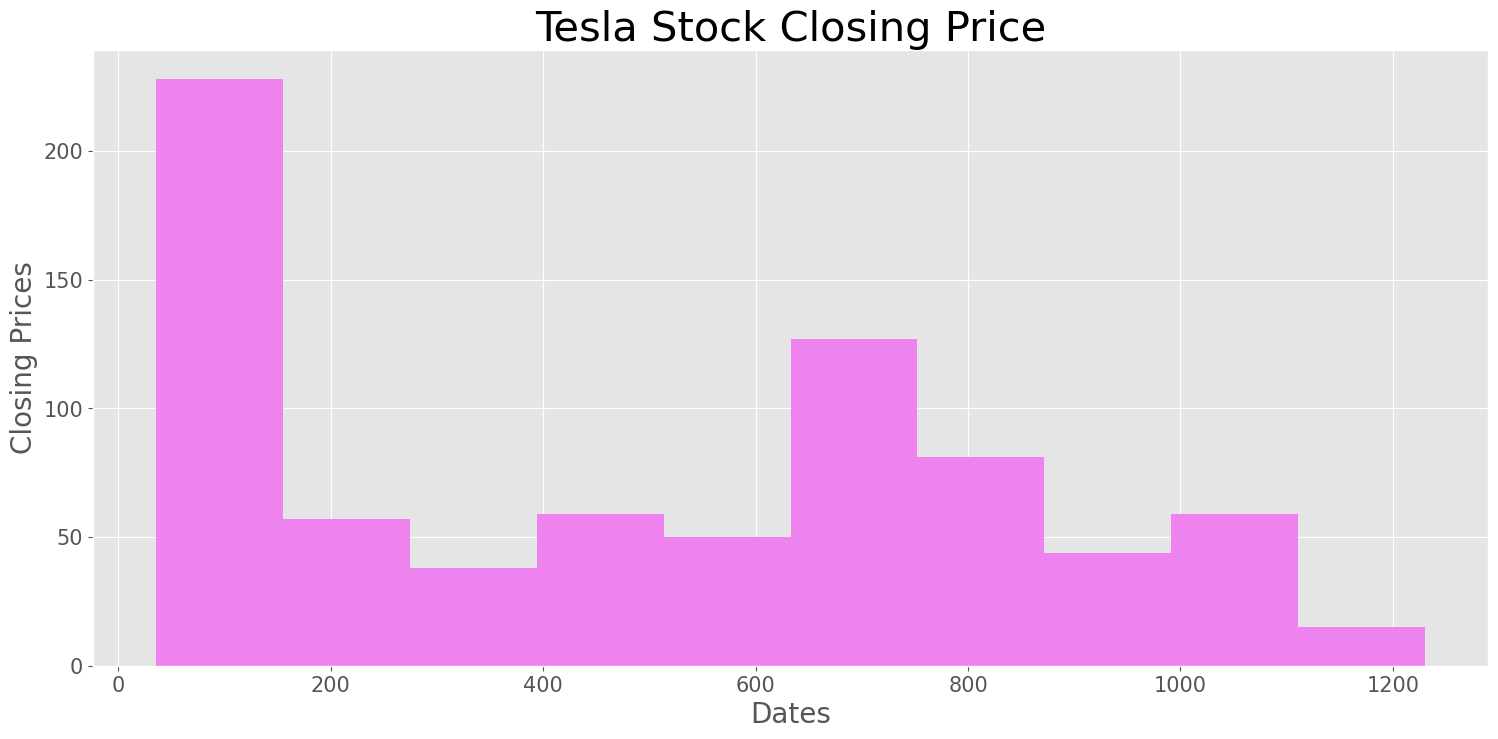

In [27]:
# Histogram 

plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Closing Prices',fontsize = 20)
plt.yticks(fontsize = 15)
plt.hist(stock_data['Close'], linewidth = 3, color = 'violet')
plt.title('Tesla Stock Closing Price',fontsize = 30)
plt.show()

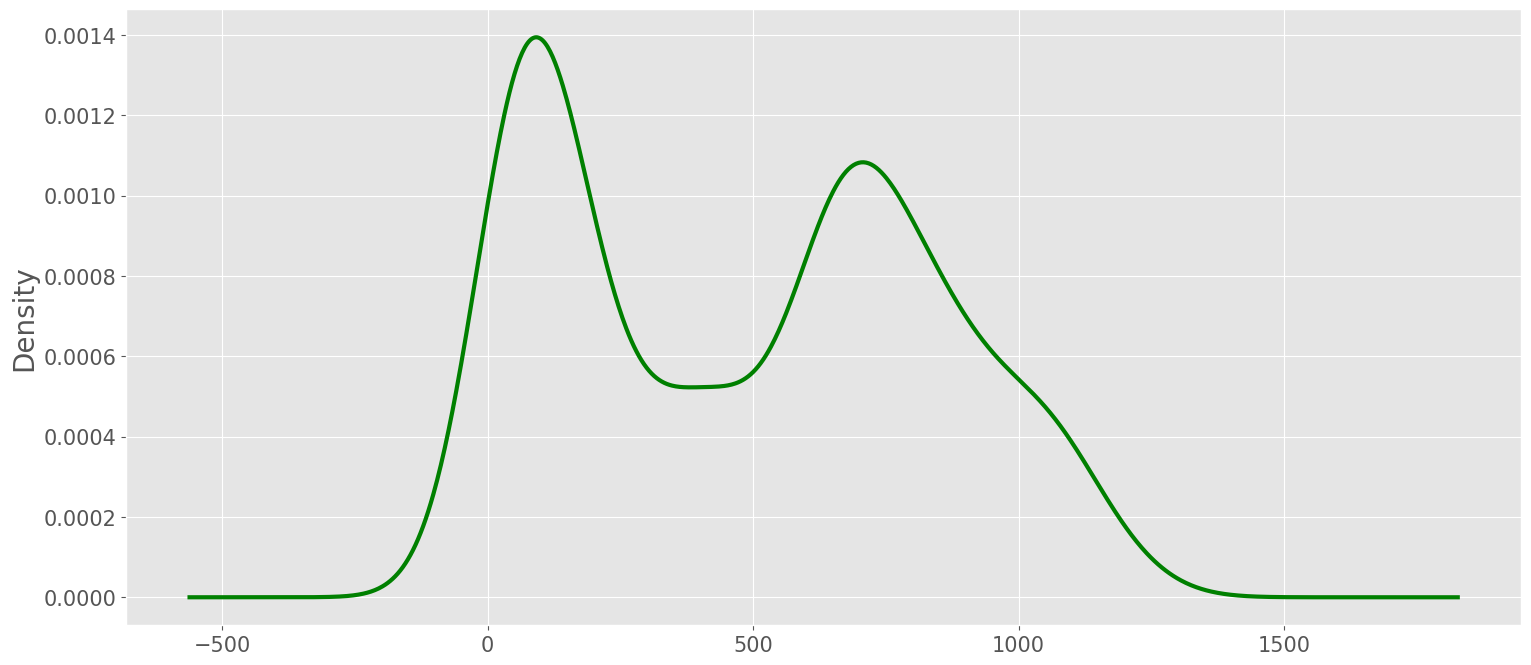

In [30]:
# Distribution Plot

df_close = stock_data["Close"]
df_close.plot(kind = 'kde',figsize = (18,8), linewidth = 3,color = 'green')
plt.xticks(fontsize = 15)
plt.grid('both')
plt.ylabel('Density',fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [31]:
rolling_mean = stock_data['Close'].rolling(48).mean()
rolling_std = stock_data['Close'].rolling(48).std()

In [32]:
rolling_std

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    113.126351
2022-05-17    115.404496
2022-05-18    119.124084
2022-05-19    121.840134
2022-05-20    125.615809
Name: Close, Length: 758, dtype: float64